# Stock Profits vs US Bond Rate
Question : Is there a correlation between Stock Monthly Profits and US 10 year Treasury Bond Rate? Will examine this by calculating the stock data over a span of 10 years.

Conclusion : Based on an analysis of ten years of data, Stock Monthly Profits and US 10 year Treasury Bond Rate do not have significant correlations.
## Monthly profits (y-axis) vs 10 year US Bond Monthly rate change (x-axis)

# Part 1: Find Monthly Stock Profits in US

In [1]:
# Common_Stockdata.get_stock_data Module import
from Common_Module.Common_Stockdata import get_stock_data
from Common_Module.Common_TreasuryBond import get_year10BondRate_Data_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [2]:
# Load the Stock DataFrame using the function from common module
stock_info_df = get_stock_data()
stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1091,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1092,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1093,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1094,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1095,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3602,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3603,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3604,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3605,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [3]:
# Monthly Stock Profits dataFrame
# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
first_open = monthly_data['Open'].first().reset_index()
last_close = monthly_data['Close'].last().reset_index()

monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
monthly_profit_df = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': monthly_profit
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_profit_merge_df = pd.merge(monthly_profit_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_profit_final_df = monthly_profit_merge_df[["Year", "Month", "Month_Number", "Monthly_Profit"]]
monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')

monthly_profit_final_df

,Year,Month,Month_Number,Monthly_Profit
0,2010,January,1,2.52
1,2010,February,2,-1.34
2,2010,March,3,-2.82
3,2010,April,4,-2.05
4,2010,May,5,3.99
...,...,...,...,...
115,2019,August,8,1.22
116,2019,September,9,-2.14
117,2019,October,10,-10.29
118,2019,November,11,-6.65


# Part 2: Find 10 Year Treasury Bond Monthly change

In [4]:
# Load the 10 Year Treasury Bond DataFrame using the function from common module
Year10BondRate_Data_df = get_year10BondRate_Data_data()
Year10BondRate_Data_df["Date"] = Year10BondRate_Data_df["Date"].astype('datetime64[ns]')
Year10BondRate_Data_df

,Date,Year10Bond_Rate,Year,Month,Day
0,2010-01-01,.,2010,1.0,01
1,2010-01-04,3.85,2010,1.0,04
2,2010-01-05,3.77,2010,1.0,05
3,2010-01-06,3.85,2010,1.0,06
4,2010-01-07,3.85,2010,1.0,07
...,...,...,...,...,...
2603,2019-12-25,.,2019,12.0,25
2604,2019-12-26,1.90,2019,12.0,26
2605,2019-12-27,1.88,2019,12.0,27
2606,2019-12-30,1.90,2019,12.0,30


In [5]:
# Extract 'Year' and 'Month' from 'Date'
Year10BondRate_Data_df['Year'] = Year10BondRate_Data_df['Date'].dt.year
Year10BondRate_Data_df['Month'] = Year10BondRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name
Year10BondRate_Data_df.rename(columns={'Year10Bond_Rate': 'Rate'}, inplace=True)   # Rename "Interest_Rate" column to "Rate"


# Optionally, rearrange columns if needed
Year10BondRate_Data_df = Year10BondRate_Data_df[['Year', 'Month', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
Year10BondRate_Data_df['Rate'] = pd.to_numeric(Year10BondRate_Data_df['Rate'], errors='coerce')
Year10BondRate_Data_df["Year"] = Year10BondRate_Data_df["Year"].astype('str')


Year10BondRate_Data_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_48952\3279427163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year10BondRate_Data_df['Rate'] = pd.to_numeric(Year10BondRate_Data_df['Rate'], errors='coerce')
C:\Users\junhy\AppData\Local\Temp\ipykernel_48952\3279427163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year10BondRate_Data_df["Year"] = Year10BondRate_Data_df["Year"].astype('str')


,Year,Month,Rate
0,2010,January,NaN
1,2010,January,3.85
2,2010,January,3.77
3,2010,January,3.85
4,2010,January,3.85
...,...,...,...
2603,2019,December,NaN
2604,2019,December,1.90
2605,2019,December,1.88
2606,2019,December,1.90


In [6]:
# 10 Year Treasury Bond Monthly change dataFrame
Year10BondRate_monthly_data = Year10BondRate_Data_df.groupby(['Year', 'Month'])
first_rate = Year10BondRate_monthly_data['Rate'].first().reset_index()
last_rate = Year10BondRate_monthly_data['Rate'].last().reset_index()

# Monthly Change for 10 Year Treasury Bond
Year10Bond_Monchng = last_rate['Rate'] - first_rate['Rate']

# dataFrame creation
Year10Bond_Monchng_df = pd.DataFrame({
                                    'Year': first_rate['Year'],
                                    'Month': first_rate['Month'],
                                    'Monthly_Change': Year10Bond_Monchng
                                   })
Year10Bond_Monchng_df

,Year,Month,Monthly_Change
0,2010,April,-0.20
1,2010,August,-0.52
2,2010,December,0.33
3,2010,February,-0.07
4,2010,January,-0.22
...,...,...,...
115,2019,March,-0.35
116,2019,May,-0.38
117,2019,November,0.05
118,2019,October,0.04


# Part 3: Creating combined Monthly profits & 10 Year Treasury Bond Monthly change

In [7]:
# Merge two dataFrame (Nasdaq Monthly profit + 10 Year Treasury Bond Monthly change)

MonthlyProfit_10YearBond_df = pd.merge(monthly_profit_final_df, Year10Bond_Monchng_df, on= ["Year","Month"], how="inner")
MonthlyProfit_10YearBond_df

,Year,Month,Month_Number,Monthly_Profit,Monthly_Change
0,2010,January,1,2.52,-0.22
1,2010,February,2,-1.34,-0.07
2,2010,March,3,-2.82,0.23
3,2010,April,4,-2.05,-0.20
4,2010,May,5,3.99,-0.41
...,...,...,...,...,...
115,2019,August,8,1.22,-0.40
116,2019,September,9,-2.14,0.21
117,2019,October,10,-10.29,0.04
118,2019,November,11,-6.65,0.05


# Scatter Plot (x = Stock Monthly Profits, y= 10 year US Bond Monthly rate change)

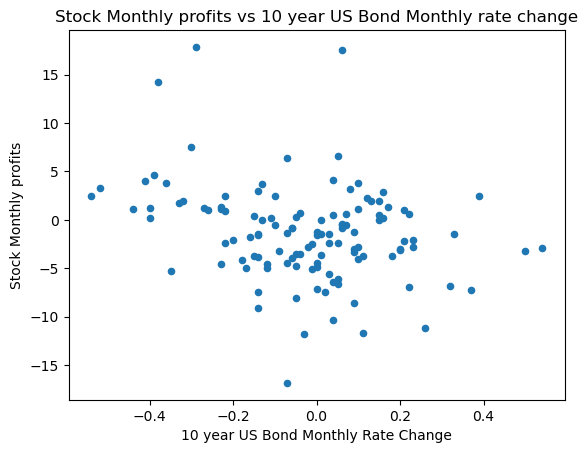

In [8]:
MonthlyProfit_10YearBond_df.plot(kind='scatter', x='Monthly_Change', y='Monthly_Profit')

plt.xlabel("10 year US Bond Monthly Rate Change")
plt.ylabel("Stock Monthly profits")
plt.title(f"Stock Monthly profits vs 10 year US Bond Monthly rate change")
plt.savefig("output_data/MonthlyProfits_10yearBond.png")
plt.show()

# Line Plot per Monthly Stock Profits and 10 year US Bond Monthly Change

C:\Users\junhy\AppData\Local\Temp\ipykernel_48952\1787786273.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyProfit_10YearBond_df['Date'] = pd.to_datetime(MonthlyProfit_10YearBond_df['Year'].astype(str) + ' ' + MonthlyProfit_10YearBond_df['Month'])


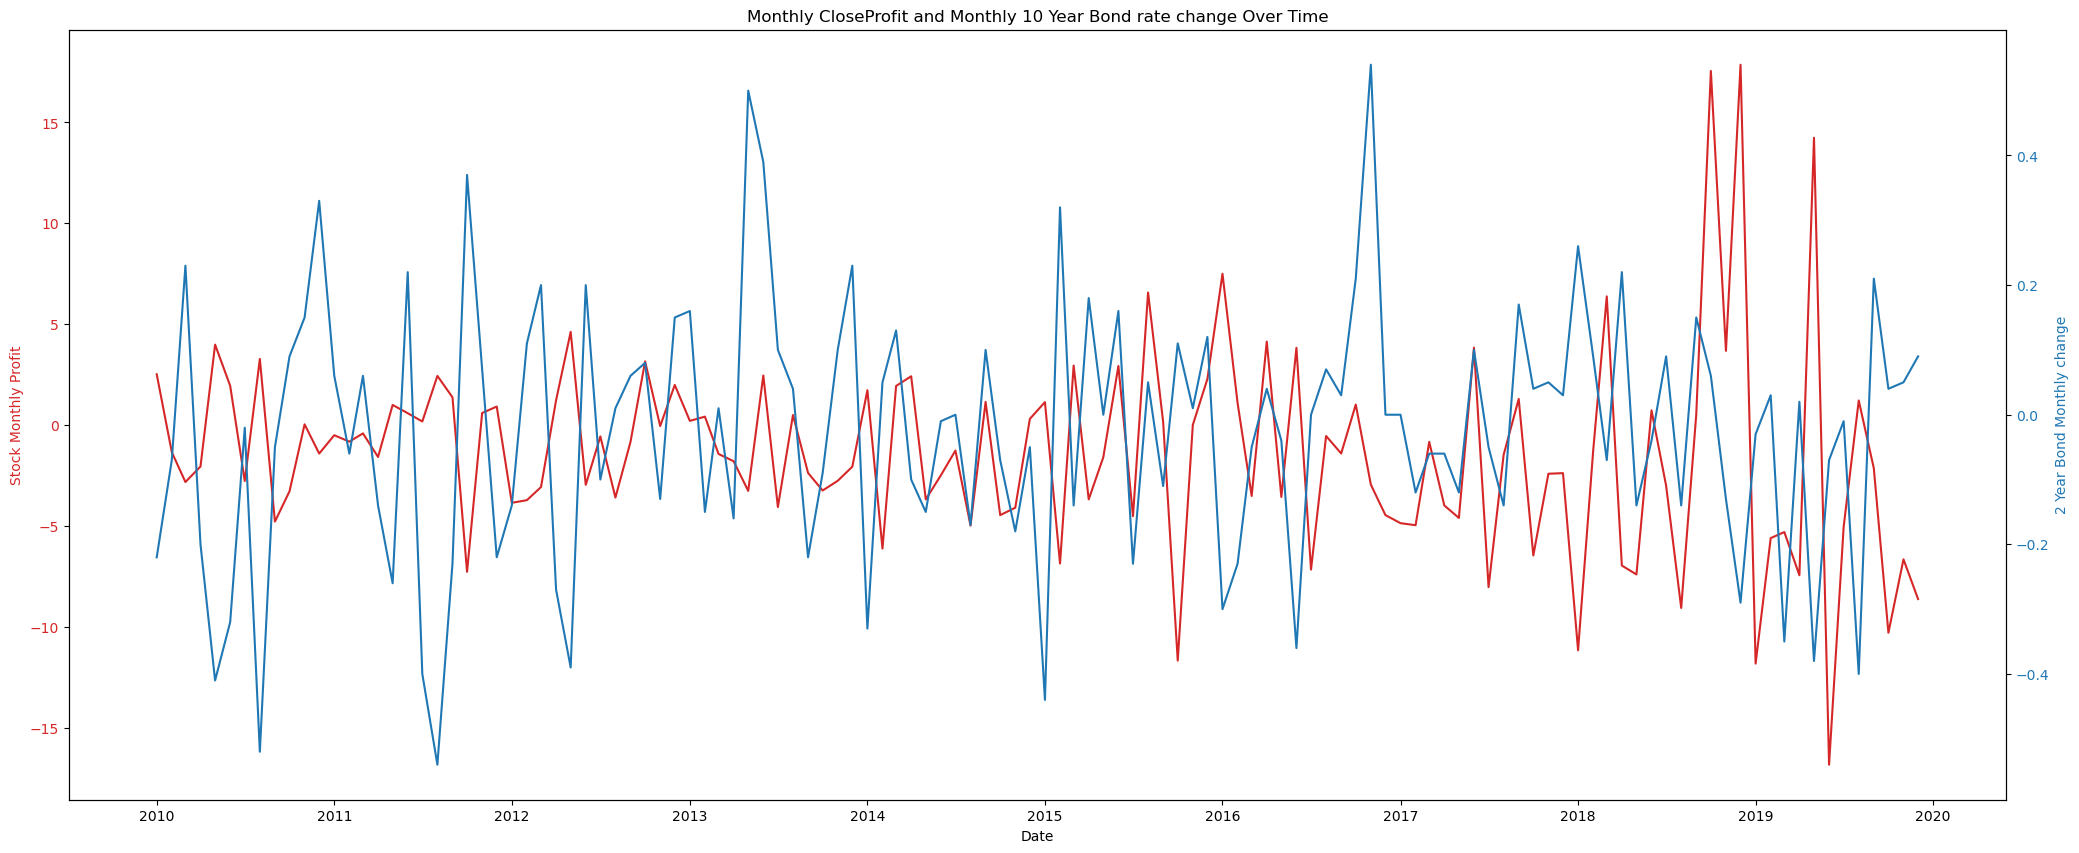

In [9]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyProfit_10YearBond_df['Date'] = pd.to_datetime(MonthlyProfit_10YearBond_df['Year'].astype(str) + ' ' + MonthlyProfit_10YearBond_df['Month'])

# Plotting
fig, ax1 = plt.subplots(figsize=(25,10))

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Monthly Profit', color=color)
ax1.plot(MonthlyProfit_10YearBond_df['Date'], MonthlyProfit_10YearBond_df['Monthly_Profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('2 Year Bond Monthly change', color=color)  
ax2.plot(MonthlyProfit_10YearBond_df['Date'], MonthlyProfit_10YearBond_df['Monthly_Change'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly CloseProfit and Monthly 10 Year Bond rate change Over Time')
plt.savefig("output_data/MonthlyProfits_10yearBond_OverTime.png")
plt.show()

# Calculate Probability when 10 year US Bond Monthly Change > 0, Monthly Stock Profits > 0

In [10]:
# Monthly Stock price is positive when 10 year Bond Monthly change is positive
positive_Bondchanges = MonthlyProfit_10YearBond_df[ (MonthlyProfit_10YearBond_df['Monthly_Profit'] > 0) & MonthlyProfit_10YearBond_df['Monthly_Change'] > 0 ]  

#  Number of each event per year
grouped_stock = MonthlyProfit_10YearBond_df.groupby(["Year"]).size()
grouped_bond = positive_Bondchanges.groupby(["Year"]).size()


# Combine the results into a DataFrame
monthly_positive_counts = pd.DataFrame({
                                        'Positive_Count': grouped_bond,
                                        'Total_Count': grouped_stock
                                        }).reset_index()

# Calculate the Probability of positive monthly profits
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Count'] / monthly_positive_counts['Total_Count'] * 100
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Prob'].round(2)


monthly_positive_counts

,Year,Positive_Count,Total_Count,Positive_Prob
0,2010,5,12,41.67
1,2011,7,12,58.33
2,2012,4,12,33.33
3,2013,4,12,33.33
4,2014,5,12,41.67
5,2015,7,12,58.33
6,2016,5,12,41.67
7,2017,2,12,16.67
8,2018,6,12,50.00
9,2019,2,12,16.67


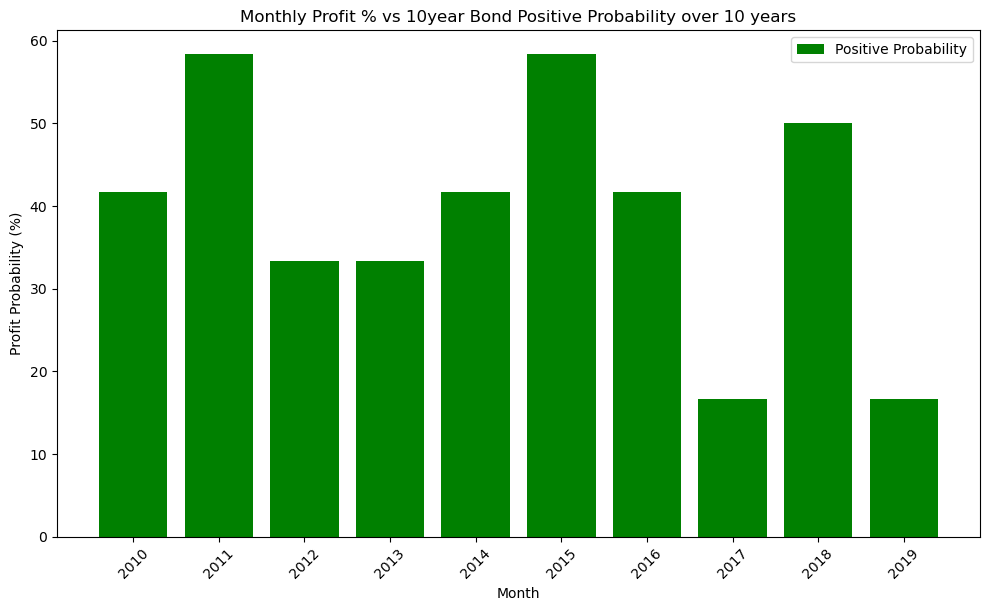

In [11]:
plt.figure(figsize=(10,6))

plt.bar(monthly_positive_counts["Year"], monthly_positive_counts["Positive_Prob"], color='green', label='Positive Probability')

plt.xlabel('Month')
plt.ylabel('Profit Probability (%)')
plt.title('Monthly Profit % vs 10year Bond Positive Probability over 10 years')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("output_data/MonthlyProfits_10yearBond_Prob.png")
plt.show()

